In [1]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [2]:
import requests
import json

In [10]:
#"\"Cattle\" Ireland -is:retweet"
#"\"meat\" -is:retweet"

bearer_token = config["BEARER_TOKEN"]

search_url = "https://api.twitter.com/2/tweets/search/recent" #if you want to change this you can look in the documentation 

#this needs to look like a json object so it looks like a python dictionary 
query_params = {
    'query' : "\"Cattle\" -is:retweet", 
    'max_results' : '100',
    'tweet.fields': 'author_id', 
}

#this is going to set our quest so they know we have authorization and where we are coming from
def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

#This is a http request. This is how we access their API. This is how we send a request to a specific website. 
def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
   
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

# Querying the API
json_response = connect_to_endpoint(search_url, query_params)

# Parsing the response
parsedRes = json.dumps(json_response, indent=4, sort_keys=True, ensure_ascii=True) #ensure_ascii=False so non latin charaters and emojis wont so up
print(parsedRes)

200
{
    "data": [
        {
            "author_id": "1581585911069949953",
            "edit_history_tweet_ids": [
                "1609196137877016579"
            ],
            "id": "1609196137877016579",
            "text": "Storey's Guide to Raising Beef Cattle, 3rd Edition KQZSW0Q\n\nhttps://t.co/1yrJXX1Yvc https://t.co/mXn7D89sBN"
        },
        {
            "author_id": "3245361423",
            "edit_history_tweet_ids": [
                "1609196033371766785"
            ],
            "id": "1609196033371766785",
            "text": "@m_cattle You're right. I was working within law enforcement during 9/11 and know so many good old school officers and deputies who, knew what public servant meant. How to approach, to protect. Now it's everyone is an enemy. Noticed a lot are scared, paranoid, &amp; jumpy now. That's dangerous"
        },
        {
            "author_id": "1463013626378285062",
            "edit_history_tweet_ids": [
                "1609195837359534081

In [16]:
# similar as above just more detailed
import csv

# Extract the data from the response
data = json_response['data']

# Open a file for writing
with open('tweets.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)
    
    # Write the header row
    writer.writerow(['Author ID', 'Tweet ID', 'Tweet Text'])
    
    # Write the data rows
    for tweet in data:
        author_id = tweet['author_id']
        tweet_id = tweet['id']
                         
# Extract the data from the response
data = json_response['data']

# Open a file for writing
with open('tweets.csv', 'w', newline='', encoding='utf-8') as csvfile:
    # Create a CSV writer
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Author ID', 'Tweet ID', 'Tweet Text'])

    # Write the data rows
    for tweet in data:
        author_id = tweet['author_id']
        tweet_id = tweet['id']
        if 'text' in tweet:
            tweet_text = tweet['text']
        else:
            tweet_text = ''
        writer.writerow([author_id, tweet_id, tweet_text])

                         

This will add a fourth column to the CSV file, `'Tweet Text'`, and write the tweet text to that column for each tweet if the `'text'` field is present. If the `'text'` field is not present, it will write an empty string to the `'Tweet Text'` column. You can customize the behavior of the `if` statement as needed to handle other cases where the `'text'` field is not present.

In [18]:
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Open the CSV file for reading
with open('tweets.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    # Iterate through the rows of the CSV file
    for row in reader:
        # Extract the tweet text
        tweet_text = row[2]

        # Use the SentimentIntensityAnalyzer to get the sentiment scores for the tweet
        scores = sia.polarity_scores(tweet_text)

        # Print the scores for the tweet
        print(scores)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\naomi\AppData\Roaming\nltk_data...


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.228, 'neu': 0.675, 'pos': 0.097, 'compound': -0.7732}
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.8358}
{'neg': 0.286, 'neu': 0.665, 'pos': 0.048, 'compound': -0.8957}
{'neg': 0.0, 'neu': 0.952, 'pos': 0.048, 'compound': 0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.114, 'neu': 0.842, 'pos': 0.044, 'compound': -0.6353}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'compound': -0.7096}
{'neg': 0.173, 'neu': 0.63, 'pos': 0.197, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.7351}
{'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.2755}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.057, 'neu': 0.943, 'pos': 0.0, 'compound': -

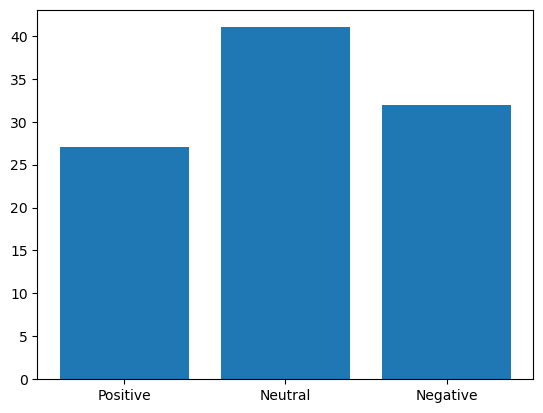

In [25]:
import matplotlib.pyplot as plt

# Initialize lists to store the polarity scores
positive_scores = []
negative_scores = []
neutral_scores = []

# Open the CSV file for reading
with open('tweets.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    # Iterate through the rows of the CSV file
    for row in reader:
        # Extract the tweet text
        tweet_text = row[2]

        # Use the SentimentIntensityAnalyzer to get the sentiment scores for the tweet
        scores = sia.polarity_scores(tweet_text)

        # Append the scores to the appropriate list
        if scores['compound'] > 0:
            positive_scores.append(scores['compound'])
        elif scores['compound'] < 0:
            negative_scores.append(scores['compound'])
        else:
            neutral_scores.append(scores['compound'])

# Create a bar chart with the polarity scores
plt.bar(['Positive', 'Neutral', 'Negative'], [len(positive_scores), len(neutral_scores), len(negative_scores)])

# Show the plot
plt.show()

In [26]:
import pandas as pd

# Load the data into a dataframe
df = pd.read_csv('tweets.csv')

# Select rows where the value in the 'Polarity_Rating' column is 'Positive'
df_positive = df[df['Polarity_Rating'] == 'Positive']

# Select rows where the value in the 'Polarity_Rating' column is 'Neutral'
df_neutral = df[df['Polarity_Rating'] == 'Neutral']

# Select rows where the value in the 'Polarity_Rating' column is 'Negative'
df_negative = df[df['Polarity_Rating'] == 'Negative']

KeyError: 'Polarity_Rating'

This code reads the tweet_text field from each row of the CSV file, and it uses the SentimentIntensityAnalyzer from nltk to compute the sentiment scores for each tweet. The sentiment scores are returned as a dictionary with four fields: 'neg', 'neu', 'pos', and 'compound'. The 'neg', 'neu', and 'pos' fields represent the negative, neutral, and positive sentiment scores, respectively, while the 'compound' field represents the overall compound sentiment score.

You can use these scores to classify the sentiment of the tweets as positive, negative, or neutral, or you can use them to compute statistics such as the average sentiment score for all tweets.

In [21]:
 # Classify the sentiment of the tweet based on the 'compound' score
if scores['compound'] > 0:
    sentiment = 'positive'
elif scores['compound'] < 0:
    sentiment = 'negative'
else:
    sentiment = 'neutral'

# Print the sentiment of the tweet
print(f"Tweet text: {tweet_text}")
print(f"Sentiment: {sentiment}")

    

Tweet text: of foul ways, drinking-shops, gambling-saloons, cattle-trading,  #NFT  https://t.co/RE5PLZtFjH
Sentiment: neutral



This code reads the `tweet_text` field from each row of the CSV file, and it uses the `SentimentIntensityAnalyzer` to compute the sentiment scores for the tweet. It then classifies the sentiment of the tweet as positive, negative, or neutral based on the `'compound'` score.

To compute statistics such as the average sentiment score for all tweets, you can keep track of the total sentiment score and the number of tweets, and then compute the average at the end. Here is an example of how you could do this:


In [24]:
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize the total sentiment score and the number of tweets
total_score = 0
num_tweets = 0

# Open the CSV file for reading
with open('tweets.csv', 'r', encoding='utf-8') as csvfile:
    # Create a CSV reader
    reader = csv.reader(csvfile)

    # Skip the header row
    next(reader)

    # Iterate through the rows of the CSV file
    for row in reader:
        # Extract the tweet text
        tweet_text = row[2]

        # Use the SentimentIntensityAnalyzer to get the sentiment scores for the tweet
        scores = sia.polarity_scores(tweet_text)

        # Add the 'compound' score to the total sentiment score
        total_score += scores['compound']

        # Increment the number of tweets
        num_tweets += 1

        # Compute the average sentiment score
        average_score = total_score / num_tweets

        # Print the average sentiment score
        print(f"Average sentiment score: {average_score}")

Average sentiment score: 0.0
Average sentiment score: -0.3866
Average sentiment score: 0.020866666666666662
Average sentiment score: -0.20827500000000002
Average sentiment score: -0.08624000000000001
Average sentiment score: -0.07186666666666668
Average sentiment score: -0.06160000000000001
Average sentiment score: -0.1333125
Average sentiment score: -0.1185
Average sentiment score: -0.10665
Average sentiment score: -0.16146363636363636
Average sentiment score: -0.141575
Average sentiment score: -0.07413846153846154
Average sentiment score: -0.08852142857142857
Average sentiment score: -0.04016
Average sentiment score: -0.03765
Average sentiment score: -0.05150588235294118
Average sentiment score: -0.09151666666666666
Average sentiment score: -0.12372105263157894
Average sentiment score: -0.135595
Average sentiment score: -0.12913809523809525
Average sentiment score: -0.13872272727272728
Average sentiment score: -0.1646521739130435
Average sentiment score: -0.19225416666666664
Average 

This code reads the `tweet_text` field from each row of the CSV file, and it uses the `SentimentIntensityAnalyzer` to compute the sentiment scores for the tweet. It then adds the `'compound'` score to the total sentiment score and increments the number of tweets. At the end, it computes the average sentiment score by dividing the total sentiment score by the number of tweets.

I hope this helps! Let me know if you have any questions.


Method 2

In [25]:
twitter_keys = f'''keys:
    access_token: {config["API_KEY"]}
    access_token_secret: {config["API_KEY_SECRET"]}
    bearer_token: {config["BEARER_TOKEN"]}
'''

In [35]:
# import json
from twitter_stream import FilteredStream
from time import time

start = time()
stream = FilteredStream()
#how to create a rule. Here it is going to be a dictionary 
rule = {
    "add" : [
        {
            "Value": "\"beef\" OR \"cattle\" OR \"Ireland\" OR \"France\" -is:retweet",
            "tag": "Cattle in Ireland"
        }
    ]
}

stream.add_rule(data=rule)
tweetList = []
for tweet in stream.connect():
    parsedTweet = json.dumps(tweet, indent=4, ensure_ascii=False)
    tweetList.append(parsedTweet)
    print(parsedTweet)
    print(f"There are: {len(tweetList)} tweets, about {len(tweetList)/(time()-start)} tweets per second after {(time()-start)} seconds")

HTTPError: 409 Client Error: Conflict for url: https://api.twitter.com/2/tweets/search/stream

In [28]:
#!pip install beautifulsoup4
#!pip install requests_html

In [21]:
from bs4 import BeautifulSoup
from requests_html import AsyncHTMLSession

In [25]:
import requests_html

session = requests_html.HTMLSession()
url = 'https://www.farmersjournal.ie/farming-news/beef/54'

In [26]:
r = session.get(url)

In [27]:
r.html.render(sleep=1, scrolldown=5)

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

In [30]:
import asyncio
import requests_html

async def main():
    async with requests_html.AsyncHTMLSession() as session:
        response = await session.get('https://www.farmersjournal.ie/farming-news/beef/54')
        response.html.render()
        links = response.html.absolute_links
        product_elements = response.html.find('article')
        product_names = [element.text for element in product_elements]
        print(product_names)

await main()

AttributeError: __aenter__

In [31]:
#import what we need
from requests_html import AsyncHTMLSession
session = AsyncHTMLSession()

#use session to get the page
r = session.get('https://www.farmersjournal.ie/farming-news/beef/54')

#render the html, sleep=1 to give it a second to finish before moving on. scrolldown= how many times to page down on the browser, to get more results. 5 was a good number here
r.html.render(sleep=1, scrolldown=5)

#find all the articles by using inspect element and create blank list
articles = r.html.find('article')
newslist = []

#loop through each article to find the title and link. try and except as repeated articles from other sources have different h tags.
for item in articles:
    try:
        newsitem = item.find('h3', first=True)
        title = newsitem.text
        link = newsitem.absolute_links
        newsarticle = {
            'title': title,
            'link': link 
        }
        newslist.append(newsarticle)
    except:
       pass

#print the length of the list
print(len(newslist))

AttributeError: '_asyncio.Future' object has no attribute 'html'

In [ ]:
async def main():
    async with SomeAsyncContextManager() as context:
        # Use the context object here
        ...

await main()


In [32]:
# Import what we need
import asyncio
import requests_html

async def main():
    # Create an AsyncHTMLSession object
    async with requests_html.AsyncHTMLSession() as session:
        # Use the session to make an asynchronous HTTP GET request
        response = await session.get('https://www.farmersjournal.ie/farming-news/beef/54')

        # Render the HTML
        response.html.render(sleep=1, scrolldown=5)

        # Find all the articles
        articles = response.html.find('article')
        newslist = []

        # Loop through each article to find the title and link
        for item in articles:
            try:
                newsitem = item.find('h3', first=True)
                title = newsitem.text
                link = newsitem.absolute_links
                newsarticle = {
                    'title': title,
                    'link': link 
                }
                newslist.append(newsarticle)
            except:
                pass

        # Print the length of the list
        print(len(newslist))

# Run the main function
await main()

AttributeError: __aenter__

try again

In [26]:
#!pip install nltk

In [27]:
#!pip install newspaper3k

In [3]:
#import the libraries
import nltk
from newspaper import Article

In [12]:
#Get the article
url = 'https://www.farmersjournal.ie/beef-prices-factories-hungry-for-prime-cattle-740677'
article = Article(url)

In [13]:
# Do some NLP
article.download()
article.parse()
nltk.download('punkt')
article.nlp()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naomi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
#Get the authors
article.authors

[]

In [15]:
#Get the publish date
article.publish_date

In [16]:
#Get the top image
article.top_image

'https://s3-eu-west-1.amazonaws.com/ifj/WEBFILES/000/740/677/1929555-740677.jpg'

## how do I web scrape all the articles on the farmers journal website about beef using python

In [40]:
import requests

url = "https://www.farmersjournal.ie/farming-news/beef/54"

response = requests.get(url)
html = response.text


In [41]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, "html.parser")


In [42]:
articles = []

for article in soup.find_all("article"):
    title = article.find("h2").text
    url = article.find("a")["href"]
    if "beef" in title.lower() or "trade" in url.lower() or "cattle" in title.lower() or "mart" in url.lower():
        articles.append({"title": title, "url": url})


In [36]:
articles = []

for article in soup.find_all("article"):
    title = article.find("h2").text
    url = article.find("a")["href"]
    
    # Make an HTTP request to the URL of the article
    response = requests.get(url)
    
    # Parse the HTML content of the response
    article_soup = BeautifulSoup(response.text, "html.parser")
    
    # Extract the text of the article
    text = article_soup.get_text()
    
    if "beef" in title.lower() or "trade" in url.lower() or "cattle" in title.lower() or "cattle" in url.lower() or "beef" in text.lower() or "cattle" in text.lower():
        articles.append({"title": title, "url": url, "text": text})

In [43]:
articles

[]

In HTML, h2 is the tag for a level-2 heading. It is used to define a section or topic within the content of a webpage. The h2 tag is usually used for subheadings within the main content of a webpage, and is usually preceded by a level-1 heading (h1) and followed by level-3 headings (h3) or lower-level headings as needed.

The href attribute is used in the a tag (anchor tag) to specify the URL of the webpage that the link points to. When a user clicks on a link, their web browser will navigate to the webpage specified in the href attribute.

In [35]:
import csv

with open("articles.csv", "w", newline="") as csvfile:
    fieldnames = ["title", "url"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for article in articles:
        writer.writerow(article)

In [36]:
import pandas as pd
df = pd.read_csv('articles.csv')

In [37]:
df

,title,url


In [19]:
import requests
from bs4 import BeautifulSoup

# Send a request to the website and retrieve the HTML content
response = requests.get('https://www.farmersjournal.ie/farming-news/beef/54')
html_content = response.text

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the articles about beef
articles = soup.find_all('article', class_='fj-c-article-card')

# Print the articles
for article in articles:
    print(article.text)